# Problema 2.  Central de emergencias

La central de un servicio de emergencias dispone de tres teléfonos para
atender las llamadas. La duración de las llamadas sigue una distribución
normal con los parámetros que recoge la tabla en minutos.

|       **Operador teléfono**       |    **Media**   |     **Desviación**  |
|-------------------------|----------------------|------------------|
|             1          |      2,0    |     0,4              |
|             2           |      2,1    |        0,3          |
|           3         |      1,9         |      0,5           ||


Determine el tiempo medio de respuesta de la central de emergencias.

### 1. Identificamos las variables
 $x$ = Duración de la llamada 

### 2. Determine la distribución de probabilidad
La duración de las llamadas sigue una distribución normal cuyos
parámetros dependen del operador telefónico que atiende la llamada.

### 3. Modele las variables aleatorias

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def duracion():
    return random.uniform(0,1)

In [51]:
def duracion_llamada():
    operador_1 = norm.ppf(duracion())
    operador_2 = norm.ppf(duracion())
    operador_3 = norm.ppf(duracion())
    duracion_operador1 = 2.0 + operador_1*0.4
    duracion_operador2 = 2.1 + operador_2*0.3
    duracion_operador3 = 1.9 + operador_3*0.5
    return max(duracion_operador1, duracion_operador2, duracion_operador3)

In [52]:
def experimento(iteraciones):
    lista = []
    i = 0
    s = 0
    while i <= iteraciones:
        i += 1
        s = duracion_llamada()
        lista.append(s/i+1)
    return lista

In [53]:
x = duracion_llamada()
x

2.007519281729703

In [54]:
e = experimento(200)
np.mean(e)

1.0679192332200727

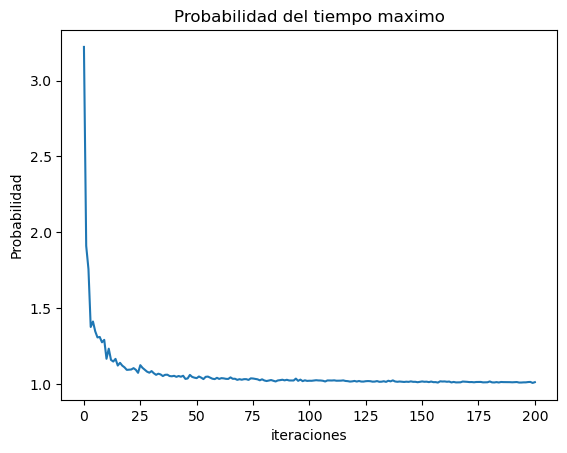

In [55]:
plt.plot(s)
plt.xlabel('iteraciones')
plt.ylabel('Probabilidad')
plt.title('Probabilidad del tiempo maximo')
plt.show()

### 4. Repita el experimento n veces

In [56]:
def simulacion(repeticiones):
    List = []
    for i in range(repeticiones):
        List.append(np.mean(experimento(100)))
    return List

In [57]:
simulacion = simulacion(100)

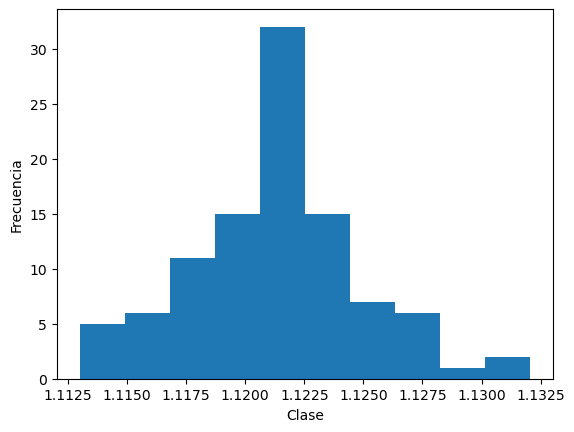

In [58]:
plt.hist(simulacion)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

In [59]:
print(np.mean(simulacion), np.std(simulacion))

1.1212987447535216 0.003690715719981914


In [60]:
np.mean(simulacion)

1.1212987447535216

In [50]:
#Calculamos el intervalo de confianza
np.mean(simulacion) - 1.96*np.std(simulacion)/np.sqrt(50), np.mean(simulacion) + 1.96*np.std(simulacion)/np.sqrt(50) 

(1.107361956215112, 1.1097357265656234)